# 深度學習(Deep Learning)
本章節分成三大段落  
1. 自動微分
2. 簡單線性回歸
3. 使用Tensorflow 進行數字0~9辨識

In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

## 一、自動微分

### 1. 利用tenosrflow 
[資料來源](https://ithelp.ithome.com.tw/articles/10233555)  
方程式: $y = X^2$   
使用套件: tensorflow   
資料為numpy，但須轉為tensorflow資料型態

In [2]:
import numpy as np 
import tensorflow as tf 

# x 宣告為 tf.constant，就要加 g.watch(x)
x = tf.Variable(3.0)

# 自動微分: 使用tensorflow進行一皆導數
with tf.GradientTape() as g:
    #g.watch(x)
    y = x * x
    
# g.gradient(y, x) 取得梯度，Y對x作微分
dy_dx = g.gradient(y, x) # Will compute to 6.0

# 轉換為 NumPy array 格式，方便顯示
print(dy_dx.numpy())

6.0


### 2. 利用Pytoch 進行自動微分與梯度下降
需先安裝Pytoch，[參考網址](https://pytorch.org/get-started/locally/) 

In [3]:
import torch

x = torch.tensor(3.0, requires_grad=True)
y=x*x

# 反向傳導
y.backward()

print(x.grad)

tensor(6.)


## 二.利用tensorflow進行簡單迴歸
需先安裝套件，詳細安裝方法可[參考網站](https://ithelp.ithome.com.tw/articles/10233272)  

屬於神經網路中的神經層程式碼  
若要改變神經層可以套用此公式  

### 1.利用線性隨機取分別X與y 0~50之100個數據，進行簡單回歸

Epoch 0: Loss: 883.5142211914062
Epoch 1: Loss: 625.097900390625
Epoch 2: Loss: 449.9284362792969
Epoch 3: Loss: 331.1882019042969
Epoch 4: Loss: 250.6991424560547
Epoch 5: Loss: 196.1388702392578
Epoch 6: Loss: 159.15467834472656
Epoch 7: Loss: 134.0845489501953
Epoch 8: Loss: 117.0904769897461
Epoch 9: Loss: 105.5708236694336
Epoch 10: Loss: 97.76203918457031
Epoch 11: Loss: 92.46871948242188
Epoch 12: Loss: 88.88050079345703
Epoch 13: Loss: 86.4480972290039
Epoch 14: Loss: 84.79920959472656
Epoch 15: Loss: 83.68140411376953
Epoch 16: Loss: 82.9236068725586
Epoch 17: Loss: 82.40983581542969
Epoch 18: Loss: 82.06148529052734
Epoch 19: Loss: 81.82526397705078
Epoch 20: Loss: 81.66505432128906
Epoch 21: Loss: 81.55636596679688
Epoch 22: Loss: 81.48261260986328
Epoch 23: Loss: 81.43252563476562
Epoch 24: Loss: 81.39848327636719
Epoch 25: Loss: 81.37532043457031
Epoch 26: Loss: 81.35952758789062
Epoch 27: Loss: 81.34874725341797
Epoch 28: Loss: 81.34134674072266
Epoch 29: Loss: 81.3362426

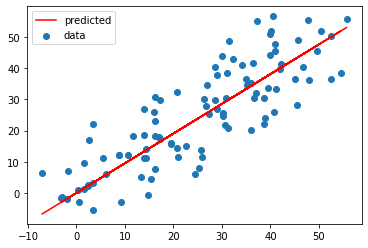

In [4]:
import numpy as np 
import tensorflow as tf 

# y_pred = W*X + b，W與b可以隨意設定
W = tf.Variable(0.0)
b = tf.Variable(0.0)

# 定義損失函數
def loss(y, y_pred):
    return tf.reduce_mean(tf.square(y - y_pred))  #MSE公式

# 定義預測值
def predict(X):
    return W * X + b
    
# 定義訓練函數
def train(X, y, epochs=40, lr=0.0001):
    current_loss=0
    # 執行訓練
    for epoch in range(epochs):
        with tf.GradientTape() as t:   # 梯度下降
            t.watch(tf.constant(X))    # X變數設定為常數constant需加入watch
            current_loss = loss(y, predict(X))

        # 取得 W, b 個別的梯度
        dW, db = t.gradient(current_loss, [W, b])
        
        # 更新權重
        # 新權重 = 原權重 — 學習率(learning_rate) * 梯度(gradient)
        W.assign_sub(lr * dW) # W -= lr * dW
        b.assign_sub(lr * db)

        # 顯示每一訓練週期的損失函數
        print(f'Epoch {epoch}: Loss: {current_loss.numpy()}') 


# 產生隨機資料
# random linear data: 100 between 0-50
n = 100
X = np.linspace(0, 50, n) 
y = np.linspace(0, 50, n) 
  
# Adding noise to the random linear data 
X += np.random.uniform(-10, 10, n) 
y += np.random.uniform(-10, 10, n) 

# reset W,b
W = tf.Variable(0.0)
b = tf.Variable(0.0)

# 執行訓練
train(X, y)

# W、b 的最佳解
print(W.numpy(), b.numpy())

import matplotlib.pyplot as plt 

plt.scatter(X, y, label='data')
plt.plot(X, predict(X), 'r-', label='predicted')
plt.legend()

## 三、TF sample 辨識0~9的數字
由Tensorflow官網提供程式碼  
從參考網站複製程式碼，[參考網站](https://www.tensorflow.org/overview/?hl=zh_tw) 
![](https://github.com/Yi-Huei/bin/blob/master/images/tl_sample2.png?raw=true)

In [5]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

#載入資料集mnist，並執行切割
(x_train, y_train),(x_test, y_test) = mnist.load_data()

#特徵工程: (X-min)/(255-0)常態化
x_train, x_test = x_train / 255.0, x_test / 255.0
 
#套入模型: Deep Learning，註解1
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),  #圖片28*28pix，input為這784
  tf.keras.layers.Dense(128, activation='relu'),  #Dense為連結層，128個神經元
  tf.keras.layers.Dropout(0.2),                   #訓練過程中隨機丟棄20%神經元
  tf.keras.layers.Dense(10, activation='softmax') #結果0~9，10個結果
])

'''參數可以改動
    optimizer 優化器，本程式指定adam
    loss 損失率
    metrics 準確率
    (註解2)
'''
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1) #隨機梯度下降，註解3
model.compile(optimizer=optimizer, #'adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5


   1/1875 [..............................] - ETA: 0s - loss: 2.5737 - accuracy: 0.0938

  86/1875 [>.............................] - ETA: 1s - loss: 1.0346 - accuracy: 0.7013

 176/1875 [=>............................] - ETA: 0s - loss: 0.7760 - accuracy: 0.7738

 266/1875 [===>..........................] - ETA: 0s - loss: 0.6644 - accuracy: 0.8052



 356/1875 [====>.........................] - ETA: 0s - loss: 0.5990 - accuracy: 0.8242

 448/1875 [======>.......................] - ETA: 0s - loss: 0.5536 - accuracy: 0.8379

 538/1875 [=======>......................] - ETA: 0s - loss: 0.5214 - accuracy: 0.8476

 628/1875 [=========>....................] - ETA: 0s - loss: 0.4942 - accuracy: 0.8561



 718/1875 [==========>...................] - ETA: 0s - loss: 0.4703 - accuracy: 0.8635

 810/1875 [===========>..................] - ETA: 0s - loss: 0.4505 - accuracy: 0.8694

 900/1875 [=============>................] - ETA: 0s - loss: 0.4342 - accuracy: 0.8742

 991/1875 [==============>...............] - ETA: 0s - loss: 0.4201 - accuracy: 0.8784



1082/1875 [================>.............] - ETA: 0s - loss: 0.4079 - accuracy: 0.8815

1172/1875 [=================>............] - ETA: 0s - loss: 0.3964 - accuracy: 0.8852

1263/1875 [===================>..........] - ETA: 0s - loss: 0.3856 - accuracy: 0.8885

1353/1875 [====================>.........] - ETA: 0s - loss: 0.3768 - accuracy: 0.8911

1442/1875 [======================>.......] - ETA: 0s - loss: 0.3680 - accuracy: 0.8937

1533/1875 [=======================>......] - ETA: 0s - loss: 0.3603 - accuracy: 0.8959

1624/1875 [========================>.....] - ETA: 0s - loss: 0.3534 - accuracy: 0.8979

1716/1875 [==========================>...] - ETA: 0s - loss: 0.3470 - accuracy: 0.9000

1808/1875 [===========================>..] - ETA: 0s - loss: 0.3405 - accuracy: 0.9018



1875/1875 [==============================] - 1s 562us/step - loss: 0.3357 - accuracy: 0.9031


Epoch 2/5
   1/1875 [..............................] - ETA: 0s - loss: 0.2197 - accuracy: 0.9375



  93/1875 [>.............................] - ETA: 0s - loss: 0.2122 - accuracy: 0.9355

 182/1875 [=>............................] - ETA: 0s - loss: 0.1942 - accuracy: 0.9421



 274/1875 [===>..........................] - ETA: 0s - loss: 0.1908 - accuracy: 0.9438

 366/1875 [====>.........................] - ETA: 0s - loss: 0.1870 - accuracy: 0.9452



 456/1875 [======>.......................] - ETA: 0s - loss: 0.1885 - accuracy: 0.9444

 547/1875 [=======>......................] - ETA: 0s - loss: 0.1856 - accuracy: 0.9450

 638/1875 [=========>....................] - ETA: 0s - loss: 0.1860 - accuracy: 0.9450

 724/1875 [==========>...................] - ETA: 0s - loss: 0.1842 - accuracy: 0.9454



 816/1875 [============>.................] - ETA: 0s - loss: 0.1833 - accuracy: 0.9456

 907/1875 [=============>................] - ETA: 0s - loss: 0.1820 - accuracy: 0.9461

 997/1875 [==============>...............] - ETA: 0s - loss: 0.1819 - accuracy: 0.9461

1090/1875 [================>.............] - ETA: 0s - loss: 0.1814 - accuracy: 0.9465



1181/1875 [=================>............] - ETA: 0s - loss: 0.1799 - accuracy: 0.9474

1273/1875 [===================>..........] - ETA: 0s - loss: 0.1790 - accuracy: 0.9477

1365/1875 [====================>.........] - ETA: 0s - loss: 0.1778 - accuracy: 0.9484

1449/1875 [======================>.......] - ETA: 0s - loss: 0.1765 - accuracy: 0.9488



1540/1875 [=======================>......] - ETA: 0s - loss: 0.1762 - accuracy: 0.9487

1632/1875 [=========================>....] - ETA: 0s - loss: 0.1752 - accuracy: 0.9491

1721/1875 [==========================>...] - ETA: 0s - loss: 0.1743 - accuracy: 0.9493

1813/1875 [============================>.] - ETA: 0s - loss: 0.1736 - accuracy: 0.9495



1875/1875 [==============================] - 1s 561us/step - loss: 0.1730 - accuracy: 0.9497


Epoch 3/5
   1/1875 [..............................] - ETA: 0s - loss: 0.0812 - accuracy: 0.9688



  91/1875 [>.............................] - ETA: 0s - loss: 0.1523 - accuracy: 0.9540



 181/1875 [=>............................] - ETA: 0s - loss: 0.1395 - accuracy: 0.9593



 273/1875 [===>..........................] - ETA: 0s - loss: 0.1379 - accuracy: 0.9606

 364/1875 [====>.........................] - ETA: 0s - loss: 0.1392 - accuracy: 0.9589

 455/1875 [======>.......................] - ETA: 0s - loss: 0.1409 - accuracy: 0.9590

 547/1875 [=======>......................] - ETA: 0s - loss: 0.1408 - accuracy: 0.9592



 639/1875 [=========>....................] - ETA: 0s - loss: 0.1384 - accuracy: 0.9595

 730/1875 [==========>...................] - ETA: 0s - loss: 0.1373 - accuracy: 0.9596

 822/1875 [============>.................] - ETA: 0s - loss: 0.1365 - accuracy: 0.9594

 914/1875 [=============>................] - ETA: 0s - loss: 0.1367 - accuracy: 0.9592



1006/1875 [===============>..............] - ETA: 0s - loss: 0.1355 - accuracy: 0.9599

1098/1875 [================>.............] - ETA: 0s - loss: 0.1343 - accuracy: 0.9600

1190/1875 [==================>...........] - ETA: 0s - loss: 0.1331 - accuracy: 0.9600

1281/1875 [===================>..........] - ETA: 0s - loss: 0.1325 - accuracy: 0.9604



1373/1875 [====================>.........] - ETA: 0s - loss: 0.1325 - accuracy: 0.9603

1464/1875 [======================>.......] - ETA: 0s - loss: 0.1331 - accuracy: 0.9602

1556/1875 [=======================>......] - ETA: 0s - loss: 0.1331 - accuracy: 0.9603

1648/1875 [=========================>....] - ETA: 0s - loss: 0.1336 - accuracy: 0.9601



1738/1875 [==========================>...] - ETA: 0s - loss: 0.1340 - accuracy: 0.9600

1829/1875 [============================>.] - ETA: 0s - loss: 0.1331 - accuracy: 0.9602



1875/1875 [==============================] - 1s 559us/step - loss: 0.1331 - accuracy: 0.9601


Epoch 4/5
   1/1875 [..............................] - ETA: 0s - loss: 0.2822 - accuracy: 0.9688



  92/1875 [>.............................] - ETA: 0s - loss: 0.1241 - accuracy: 0.9616

 184/1875 [=>............................] - ETA: 0s - loss: 0.1170 - accuracy: 0.9640



 275/1875 [===>..........................] - ETA: 0s - loss: 0.1219 - accuracy: 0.9632

 366/1875 [====>.........................] - ETA: 0s - loss: 0.1183 - accuracy: 0.9648

 457/1875 [======>.......................] - ETA: 0s - loss: 0.1188 - accuracy: 0.9641

 549/1875 [=======>......................] - ETA: 0s - loss: 0.1182 - accuracy: 0.9641



 641/1875 [=========>....................] - ETA: 0s - loss: 0.1179 - accuracy: 0.9641

 733/1875 [==========>...................] - ETA: 0s - loss: 0.1187 - accuracy: 0.9642

 824/1875 [============>.................] - ETA: 0s - loss: 0.1172 - accuracy: 0.9649

 916/1875 [=============>................] - ETA: 0s - loss: 0.1173 - accuracy: 0.9648



1008/1875 [===============>..............] - ETA: 0s - loss: 0.1160 - accuracy: 0.9653

1100/1875 [================>.............] - ETA: 0s - loss: 0.1150 - accuracy: 0.9654

1192/1875 [==================>...........] - ETA: 0s - loss: 0.1149 - accuracy: 0.9656

1284/1875 [===================>..........] - ETA: 0s - loss: 0.1138 - accuracy: 0.9660

1375/1875 [=====================>........] - ETA: 0s - loss: 0.1134 - accuracy: 0.9660

1467/1875 [======================>.......] - ETA: 0s - loss: 0.1142 - accuracy: 0.9657

1558/1875 [=======================>......] - ETA: 0s - loss: 0.1139 - accuracy: 0.9659

1650/1875 [=========================>....] - ETA: 0s - loss: 0.1134 - accuracy: 0.9659

1742/1875 [==========================>...] - ETA: 0s - loss: 0.1134 - accuracy: 0.9657

1833/1875 [============================>.] - ETA: 0s - loss: 0.1131 - accuracy: 0.9659



1875/1875 [==============================] - 1s 555us/step - loss: 0.1131 - accuracy: 0.9659


Epoch 5/5
   1/1875 [..............................] - ETA: 0s - loss: 0.3562 - accuracy: 0.8438



  92/1875 [>.............................] - ETA: 0s - loss: 0.1065 - accuracy: 0.9660

 185/1875 [=>............................] - ETA: 0s - loss: 0.0986 - accuracy: 0.9696

 276/1875 [===>..........................] - ETA: 0s - loss: 0.0959 - accuracy: 0.9708



 367/1875 [====>.........................] - ETA: 0s - loss: 0.0967 - accuracy: 0.9701

 460/1875 [======>.......................] - ETA: 0s - loss: 0.0995 - accuracy: 0.9695

 552/1875 [=======>......................] - ETA: 0s - loss: 0.0963 - accuracy: 0.9708

 645/1875 [=========>....................] - ETA: 0s - loss: 0.0985 - accuracy: 0.9702

 737/1875 [==========>...................] - ETA: 0s - loss: 0.0992 - accuracy: 0.9703

 828/1875 [============>.................] - ETA: 0s - loss: 0.0999 - accuracy: 0.9702

 920/1875 [=============>................] - ETA: 0s - loss: 0.0988 - accuracy: 0.9706

1012/1875 [===============>..............] - ETA: 0s - loss: 0.0981 - accuracy: 0.9706

1104/1875 [================>.............] - ETA: 0s - loss: 0.0969 - accuracy: 0.9709

1196/1875 [==================>...........] - ETA: 0s - loss: 0.0959 - accuracy: 0.9711

1287/1875 [===================>..........] - ETA: 0s - loss: 0.0962 - accuracy: 0.9708

1379/1875 [=====================>........] - ETA: 0s - loss: 0.0975 - accuracy: 0.9706

1471/1875 [======================>.......] - ETA: 0s - loss: 0.0967 - accuracy: 0.9709

1563/1875 [========================>.....] - ETA: 0s - loss: 0.0974 - accuracy: 0.9707

1655/1875 [=========================>....] - ETA: 0s - loss: 0.0970 - accuracy: 0.9709

1745/1875 [==========================>...] - ETA: 0s - loss: 0.0978 - accuracy: 0.9705

1837/1875 [============================>.] - ETA: 0s - loss: 0.0977 - accuracy: 0.9703

1875/1875 [==============================] - 1s 554us/step - loss: 0.0980 - accuracy: 0.9701


  1/313 [..............................] - ETA: 0s - loss: 0.0152 - accuracy: 1.0000

122/313 [==========>...................] - ETA: 0s - loss: 0.1107 - accuracy: 0.9670

250/313 [======================>.......] - ETA: 0s - loss: 0.0875 - accuracy: 0.9749

313/313 [==============================] - 0s 417us/step - loss: 0.0814 - accuracy: 0.9763


[0.08137740939855576, 0.9763000011444092]

**準確度: 97.73%**

**註解1 : Deep learning模型說明:**  
![Alt text](https://github.com/Yi-Huei/bin/blob/master/images/tl_sample.png?raw=true)

**註解2: 梯度下降法求最佳解**  
在設定input、output、隱藏層後，進行優化器、損失函數與準確度設定，正向傳導與反向傳導一次為一次epoch，如下圖  
![](https://github.com/Yi-Huei/bin/blob/master/images/tl_sample3.png?raw=true)


**註解3:Tensorflow優化器**  
[參考網站址](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD)
![](https://github.com/Yi-Huei/bin/blob/master/images/tl_sample4.png?raw=true)

tensorflow損失率  
[參考網站]( https://www.tensorflow.org/api_docs/python/tf/keras/losses)

### 程式說明
[參考網址](https://ithelp.ithome.com.tw/articles/10233758)  
神經網路演算法依舊採用機器學習8大步驟
1. 收集資料(Dataset)
2. 清理資料(Data cleaning)  
3. 特徵工程(Feature Engineerin)
4. 資料分割為訓練組與測試組(Split)  
5. 選擇演算法(Learning Algorithm)  
6. 訓練模型(Train Model)  
7. 打分數(Score Model)  
8. 評估模型(Evalute Model)

In [6]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

In [7]:
# 匯入 MNIST 手寫阿拉伯數字 ，併分割資料
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [8]:
# 訓練/測試資料的 X/y 維度
x_train.shape, y_train.shape,x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [9]:
# 訓練資料前10筆圖片的數字
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

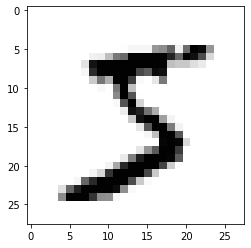

In [10]:
# 查看原始影像
import matplotlib.pyplot as plt 
img = x_train[0].reshape(28, 28)
plt.imshow(img, cmap='Greys')

In [11]:
# 顯示第1張圖片內含值
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [12]:
# 將非0的數字轉為1，顯示第1張圖片
data = x_train[1].copy()
data[data>0]=1

# 將轉換後二維內容顯示出來
text_image=[]
for i in range(data.shape[0]):
    text_image.append(''.join(str(data[i])))
text_image

['[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0]',
 '[0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0]',
 '[0 0 0

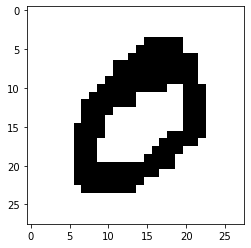

In [13]:
# 使用matplotlib.pyplot將陣列轉成圖片
img = data.reshape(28, 28)
plt.imshow(img, cmap='Greys')

In [14]:
# 特徵縮放，使用常態化(Normalization)，公式 = (x - min) / (max - min)
# 顏色範圍：0~255，所以，公式簡化為 x / 255
# 注意，顏色0為白色，與RGB顏色不同，(0,0,0) 為黑色。
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
x_train_norm[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [15]:
# 建立模型
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [16]:
# 設定優化器(optimizer)、損失函數(loss)、效能衡量指標(metrics)的類別
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
# 訓練
history = model.fit(x_train_norm, y_train, epochs=5, validation_split=0.2) #訓練時，分割出驗證資料(validation_split)20%

Epoch 1/5


   1/1500 [..............................] - ETA: 0s - loss: 2.4484 - accuracy: 0.0938

  77/1500 [>.............................] - ETA: 0s - loss: 1.0590 - accuracy: 0.6843

 153/1500 [==>...........................] - ETA: 0s - loss: 0.7735 - accuracy: 0.7731

 233/1500 [===>..........................] - ETA: 0s - loss: 0.6451 - accuracy: 0.8125

 312/1500 [=====>........................] - ETA: 0s - loss: 0.5715 - accuracy: 0.8339



 392/1500 [======>.......................] - ETA: 0s - loss: 0.5212 - accuracy: 0.8495

 466/1500 [========>.....................] - ETA: 0s - loss: 0.4881 - accuracy: 0.8574

 545/1500 [=========>....................] - ETA: 0s - loss: 0.4588 - accuracy: 0.8663

 625/1500 [===========>..................] - ETA: 0s - loss: 0.4371 - accuracy: 0.8723



 704/1500 [=============>................] - ETA: 0s - loss: 0.4188 - accuracy: 0.8782

 784/1500 [==============>...............] - ETA: 0s - loss: 0.4014 - accuracy: 0.8829

 864/1500 [================>.............] - ETA: 0s - loss: 0.3862 - accuracy: 0.8874

 942/1500 [=================>............] - ETA: 0s - loss: 0.3741 - accuracy: 0.8909



1004/1500 [===================>..........] - ETA: 0s - loss: 0.3649 - accuracy: 0.8937

1066/1500 [====================>.........] - ETA: 0s - loss: 0.3576 - accuracy: 0.8956

1133/1500 [=====================>........] - ETA: 0s - loss: 0.3485 - accuracy: 0.8981

1207/1500 [=======================>......] - ETA: 0s - loss: 0.3397 - accuracy: 0.9006



1286/1500 [========================>.....] - ETA: 0s - loss: 0.3319 - accuracy: 0.9029

1365/1500 [==========================>...] - ETA: 0s - loss: 0.3251 - accuracy: 0.9051

1445/1500 [===========================>..] - ETA: 0s - loss: 0.3175 - accuracy: 0.9074

1500/1500 [==============================] - 1s 911us/step - loss: 0.3137 - accuracy: 0.9083 - val_loss: 0.1511 - val_accuracy: 0.9567


Epoch 2/5
   1/1500 [..............................] - ETA: 0s - loss: 0.1098 - accuracy: 0.9375

  79/1500 [>.............................] - ETA: 0s - loss: 0.1675 - accuracy: 0.9553

 158/1500 [==>...........................] - ETA: 0s - loss: 0.1684 - accuracy: 0.9500

 236/1500 [===>..........................] - ETA: 0s - loss: 0.1684 - accuracy: 0.9498

 313/1500 [=====>........................] - ETA: 0s - loss: 0.1678 - accuracy: 0.9494

 391/1500 [======>.......................] - ETA: 0s - loss: 0.1662 - accuracy: 0.9512

 470/1500 [========>.....................] - ETA: 0s - loss: 0.1675 - accuracy: 0.9512

 548/1500 [=========>....................] - ETA: 0s - loss: 0.1650 - accuracy: 0.9515

 625/1500 [===========>..................] - ETA: 0s - loss: 0.1642 - accuracy: 0.9517

 703/1500 [=============>................] - ETA: 0s - loss: 0.1654 - accuracy: 0.9516

 782/1500 [==============>...............] - ETA: 0s - loss: 0.1656 - accuracy: 0.9514

 861/1500 [================>.............] - ETA: 0s - loss: 0.1651 - accuracy: 0.9518

 940/1500 [=================>............] - ETA: 0s - loss: 0.1636 - accuracy: 0.9521

1018/1500 [===================>..........] - ETA: 0s - loss: 0.1637 - accuracy: 0.9521

1095/1500 [====================>.........] - ETA: 0s - loss: 0.1618 - accuracy: 0.9526

1174/1500 [======================>.......] - ETA: 0s - loss: 0.1601 - accuracy: 0.9532

1252/1500 [========================>.....] - ETA: 0s - loss: 0.1586 - accuracy: 0.9537

1331/1500 [=========================>....] - ETA: 0s - loss: 0.1579 - accuracy: 0.9540

1410/1500 [===========================>..] - ETA: 0s - loss: 0.1566 - accuracy: 0.9543

1489/1500 [============================>.] - ETA: 0s - loss: 0.1553 - accuracy: 0.9546

1500/1500 [==============================] - 1s 748us/step - loss: 0.1554 - accuracy: 0.9546 - val_loss: 0.1226 - val_accuracy: 0.9643


Epoch 3/5
   1/1500 [..............................] - ETA: 0s - loss: 0.0289 - accuracy: 1.0000

  78/1500 [>.............................] - ETA: 0s - loss: 0.1128 - accuracy: 0.9720

 155/1500 [==>...........................] - ETA: 0s - loss: 0.1133 - accuracy: 0.9677

 232/1500 [===>..........................] - ETA: 0s - loss: 0.1151 - accuracy: 0.9679

 311/1500 [=====>........................] - ETA: 0s - loss: 0.1171 - accuracy: 0.9675

 389/1500 [======>.......................] - ETA: 0s - loss: 0.1166 - accuracy: 0.9675

 468/1500 [========>.....................] - ETA: 0s - loss: 0.1183 - accuracy: 0.9669



 547/1500 [=========>....................] - ETA: 0s - loss: 0.1188 - accuracy: 0.9666

 626/1500 [===========>..................] - ETA: 0s - loss: 0.1194 - accuracy: 0.9655

 706/1500 [=============>................] - ETA: 0s - loss: 0.1204 - accuracy: 0.9655

 785/1500 [==============>...............] - ETA: 0s - loss: 0.1203 - accuracy: 0.9654



 864/1500 [================>.............] - ETA: 0s - loss: 0.1202 - accuracy: 0.9649

 942/1500 [=================>............] - ETA: 0s - loss: 0.1188 - accuracy: 0.9652

1022/1500 [===================>..........] - ETA: 0s - loss: 0.1163 - accuracy: 0.9660

1100/1500 [=====================>........] - ETA: 0s - loss: 0.1160 - accuracy: 0.9658



1178/1500 [======================>.......] - ETA: 0s - loss: 0.1162 - accuracy: 0.9657

1256/1500 [========================>.....] - ETA: 0s - loss: 0.1156 - accuracy: 0.9661

1334/1500 [=========================>....] - ETA: 0s - loss: 0.1162 - accuracy: 0.9658

1413/1500 [===========================>..] - ETA: 0s - loss: 0.1157 - accuracy: 0.9662



1492/1500 [============================>.] - ETA: 0s - loss: 0.1155 - accuracy: 0.9662

1500/1500 [==============================] - 1s 746us/step - loss: 0.1157 - accuracy: 0.9662 - val_loss: 0.1058 - val_accuracy: 0.9693


Epoch 4/5
   1/1500 [..............................] - ETA: 0s - loss: 0.0560 - accuracy: 1.0000

  79/1500 [>.............................] - ETA: 0s - loss: 0.0877 - accuracy: 0.9751

 158/1500 [==>...........................] - ETA: 0s - loss: 0.0885 - accuracy: 0.9731

 236/1500 [===>..........................] - ETA: 0s - loss: 0.0944 - accuracy: 0.9703

 315/1500 [=====>........................] - ETA: 0s - loss: 0.0957 - accuracy: 0.9694

 393/1500 [======>.......................] - ETA: 0s - loss: 0.0968 - accuracy: 0.9706

 471/1500 [========>.....................] - ETA: 0s - loss: 0.1008 - accuracy: 0.9696

 549/1500 [=========>....................] - ETA: 0s - loss: 0.1000 - accuracy: 0.9698



 628/1500 [===========>..................] - ETA: 0s - loss: 0.0992 - accuracy: 0.9695

 708/1500 [=============>................] - ETA: 0s - loss: 0.0988 - accuracy: 0.9697

 782/1500 [==============>...............] - ETA: 0s - loss: 0.0969 - accuracy: 0.9702

 860/1500 [================>.............] - ETA: 0s - loss: 0.0979 - accuracy: 0.9700



 940/1500 [=================>............] - ETA: 0s - loss: 0.0974 - accuracy: 0.9698

1019/1500 [===================>..........] - ETA: 0s - loss: 0.0983 - accuracy: 0.9695

1097/1500 [====================>.........] - ETA: 0s - loss: 0.0970 - accuracy: 0.9697

1175/1500 [======================>.......] - ETA: 0s - loss: 0.0962 - accuracy: 0.9701



1255/1500 [========================>.....] - ETA: 0s - loss: 0.0955 - accuracy: 0.9703

1334/1500 [=========================>....] - ETA: 0s - loss: 0.0956 - accuracy: 0.9702

1414/1500 [===========================>..] - ETA: 0s - loss: 0.0958 - accuracy: 0.9703

1491/1500 [============================>.] - ETA: 0s - loss: 0.0969 - accuracy: 0.9701

1500/1500 [==============================] - 1s 747us/step - loss: 0.0968 - accuracy: 0.9701 - val_loss: 0.1013 - val_accuracy: 0.9694


Epoch 5/5
   1/1500 [..............................] - ETA: 0s - loss: 0.3146 - accuracy: 0.9375

  78/1500 [>.............................] - ETA: 0s - loss: 0.0882 - accuracy: 0.9772

 156/1500 [==>...........................] - ETA: 0s - loss: 0.0839 - accuracy: 0.9778

 235/1500 [===>..........................] - ETA: 0s - loss: 0.0784 - accuracy: 0.9785

 314/1500 [=====>........................] - ETA: 0s - loss: 0.0805 - accuracy: 0.9774

 393/1500 [======>.......................] - ETA: 0s - loss: 0.0807 - accuracy: 0.9765

 470/1500 [========>.....................] - ETA: 0s - loss: 0.0803 - accuracy: 0.9763

 542/1500 [=========>....................] - ETA: 0s - loss: 0.0797 - accuracy: 0.9760

 622/1500 [===========>..................] - ETA: 0s - loss: 0.0778 - accuracy: 0.9766

 696/1500 [============>.................] - ETA: 0s - loss: 0.0775 - accuracy: 0.9764

 773/1500 [==============>...............] - ETA: 0s - loss: 0.0794 - accuracy: 0.9759

 847/1500 [===============>..............] - ETA: 0s - loss: 0.0794 - accuracy: 0.9756



 925/1500 [=================>............] - ETA: 0s - loss: 0.0790 - accuracy: 0.9759

1004/1500 [===================>..........] - ETA: 0s - loss: 0.0799 - accuracy: 0.9755

1083/1500 [====================>.........] - ETA: 0s - loss: 0.0807 - accuracy: 0.9752

1161/1500 [======================>.......] - ETA: 0s - loss: 0.0810 - accuracy: 0.9751



1237/1500 [=======================>......] - ETA: 0s - loss: 0.0815 - accuracy: 0.9749

1314/1500 [=========================>....] - ETA: 0s - loss: 0.0817 - accuracy: 0.9749

1392/1500 [==========================>...] - ETA: 0s - loss: 0.0817 - accuracy: 0.9750

1471/1500 [============================>.] - ETA: 0s - loss: 0.0816 - accuracy: 0.9747

1500/1500 [==============================] - 1s 755us/step - loss: 0.0812 - accuracy: 0.9749 - val_loss: 0.0883 - val_accuracy: 0.9736


loss、accuracy :訓練資料的損失率與正確率  
val_loss、val_accuracy: 驗證資料的損失率與正確率

In [18]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

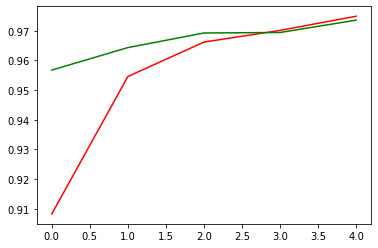

In [19]:
# 對訓練過程的準確度繪圖
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], 'r')
plt.plot(history.history['val_accuracy'], 'g')

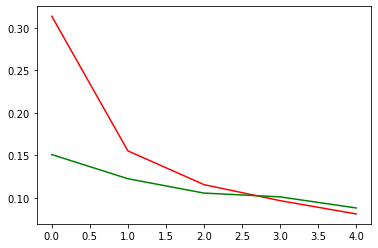

In [20]:
# 對訓練過程的損失函數繪圖
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'g')

In [21]:
# 評估，打分數
score=model.evaluate(x_test_norm, y_test, verbose=0)
score

[0.08365831524133682, 0.9751999974250793]

In [22]:
# 實際預測 20 筆
predictions = model.predict_classes(x_test_norm)
# get prediction result
print('prediction:', predictions[0:20])
print('actual    :', y_test[0:20])

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


prediction: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
actual    : [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


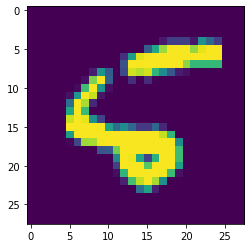

In [23]:
# 顯示錯誤的資料圖像
X2 = x_test[8,:,:]
plt.imshow(X2.reshape(28,28))
plt.show() 

In [24]:
# 顯示模型的彙總資訊
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [25]:
# 模型存檔
model.save('model.h5')

In [26]:
# 模型載入
model = tf.keras.models.load_model('model.h5')

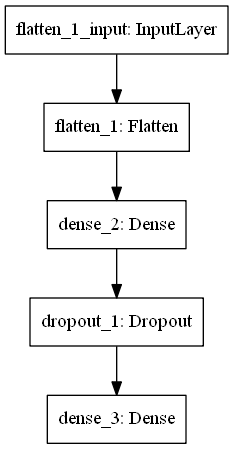

In [27]:
# 繪製模型
# 需安裝 graphviz (https://www.graphviz.org/download/)
# 將安裝路徑 C:\Program Files (x86)\Graphviz2.38\bin 新增至環境變數 path 中
# pip install graphviz
# pip install pydotplus
tf.keras.utils.plot_model(model, to_file='model.png')